## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 41.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:01<00:00, 48.9MB/s]


Посмотрим на таблицу `Ratings`.

In [3]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

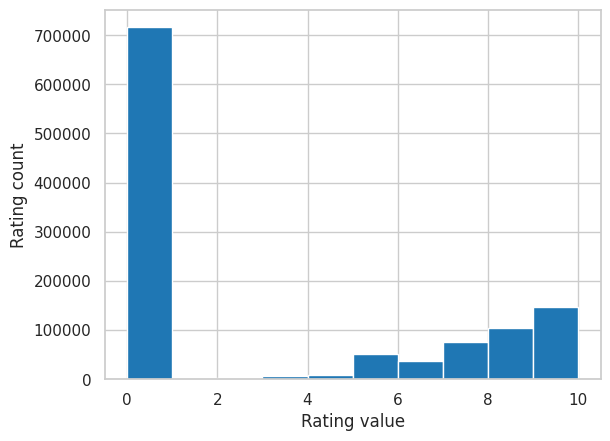

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [7]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [9]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [10]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [11]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

# Обработка данных

  В рамках данного пункта необходимо было выполнить следующие задачи:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).



---



### Удаление пропусков

Для начала посмотрим на пропущенные значения и примем решение, что с ними делать

In [12]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())].values

array([['0751352497', 'A+ Quiz Masters:01 Earth', nan, 1999,
        'Dorling Kindersley',
        'http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg',
        'http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg',
        'http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg'],
       ['193169656X', 'Tyrant Moon', 'Elaine Corvidae', 2002, nan,
        'http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg',
        'http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg',
        'http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg'],
       ['1931696993', 'Finders Keepers', 'Linnea Sinclair', 2001, nan,
        'http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg',
        'http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg',
        'http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg'],
       ['9627982032',
        'The Credit Suisse Guide to Managing Your Personal Wealth', nan,
        1995, 'Edinburgh 

Можно заметить, что в ячейках и правда отсутствует автор, расклеить и получить значения нет возможности, поэтому удалим их

In [13]:
books = books.dropna(subset=["Book-Author", "Publisher"])

In [14]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


После проверки убедились, что значения и правда отсутствуют, значит удаление прошло успешно

### Сдвинутые значения

In [15]:
v = [['078946697X',
        'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)',
        "Michael Teitelbaum",
        '2000',
        'DK Publishing Inc',
        'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg',
        'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg',
        'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'],
       ['2070426769',
        'Peuple du ciel, suivi de \'Les Bergers',
        'Jean-Marie Gustave Le ClÃ?Â©zi',
        '2003',
        'Gallimard',
        'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg',
        'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg',
        'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'],
       ['0789466953',
        'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)',
        'James Buckley',
        '2000',
        'DK Publishing Inc',
        'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg',
        'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg',
        'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg']
     ]

In [16]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")] = v

Проверяем, что теперь в столбце нет ненужных данных

In [17]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


### Ненаступившие года

Посмотрим, сколько столбцов в годом превышают нынешний 2024

In [18]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int')
books[books["Year-Of-Publication"] > 2024]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


Удалим их

In [19]:
books = books.drop(books[books['Year-Of-Publication'] > 2024].index)
books[books["Year-Of-Publication"] > 2024]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


### Удаление ссылок

In [20]:
del books['Image-URL-S']
del books['Image-URL-M']
del books['Image-URL-L']
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


### Книги с 1 оценкой

In [21]:
counts = ratings['ISBN'].value_counts()
ratings = ratings[ratings['ISBN'].isin(counts[counts > 1].index)]

In [22]:
ratings['ISBN'].value_counts()

,count
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0425068307,2
0439050227,2
0440120438,2


### Удаление нулевого рейтинга

In [23]:
ratings['Book-Rating'] = ratings['Book-Rating'].astype('int')
ratings[ratings["Book-Rating"] == 0]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149768,276704,0446605409,0
1149769,276704,059032120X,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


In [24]:
ratings = ratings.drop(ratings[ratings['Book-Rating'] == 0].index)
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
6,276736,3257224281,8
8,276744,038550120X,7
9,276745,342310538,10
16,276747,0060517794,9
...,...,...,...
1149762,276704,0380796155,5
1149771,276704,0743211383,7
1149775,276704,1563526298,9
1149777,276709,0515107662,10


# SVD

In [25]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505169 sha256=6f51573a99105202bc51692d18f1aba31c5454570332475ccf074e34e1c1054e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [26]:
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate

df = pd.merge(ratings, books[["ISBN"]], on="ISBN")
df

,User-ID,ISBN,Book-Rating
0,276726,0155061224,5
1,276744,038550120X,7
2,276747,0060517794,9
3,276747,0671537458,9
4,276747,0679776818,8
...,...,...,...
323919,276704,0380796155,5
323920,276704,0743211383,7
323921,276704,1563526298,9
323922,276709,0515107662,10


Приведем типы данных к нужному формату:

In [27]:
from sklearn.preprocessing import LabelEncoder
df['User-IvD'] = df['User-ID'].astype('int')
df['Book-Rating'] = df['Book-Rating'].astype('int')
user_encoder = LabelEncoder()
df['User-ID'] = user_encoder.fit_transform(df['User-ID'])

Создадим из нашего датасета отформатированный вариант для дальнешей работы

In [28]:
from surprise import accuracy, SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split

reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df, reader)
trainset, testset = train_test_split(data, test_size=0.25)

In [29]:
model_svd = SVD()
model_svd.fit(trainset)

predictions_svd = model_svd.test(testset)
accuracy.mae(predictions_svd)

MAE:  1.2702


1.2702139245505102

Как можно заметить, наше значение MAE (Mean Absolute Error) ниже требуемого, что и требовалось выполнить

# SGDRegressor

Подготовим датасет с информациями о книгах и расчетом среднего рейтинга для каждой из них

In [30]:
average_ratings = ratings.groupby("ISBN")["Book-Rating"].mean().reset_index()
average_ratings.columns = ["ISBN", "Average-Rating"]

books_and_ratings = pd.merge(books, average_ratings, on="ISBN")
books_and_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.666667
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,7.500000
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,7.833333
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8.176471
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,8.000000
...,...,...,...,...,...,...
89928,1572492317,Echoes of the Falling Spring,Dody Myers,2001,Burd Street Press,8.500000
89929,0684811901,Popcorn,Frances Towner Giedt,1995,Simon &amp; Schuster,7.000000
89930,0373195745,"Ranger &amp; The Rescue (Silhouette Romance, N...",Sue Swift,2002,Silhouette,7.000000
89931,0140296395,Atop an Underwood,Jack Kerouac,2000,Penguin Books,8.000000


Переведем строковые данные в числовые

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
author_encoder = LabelEncoder()
books_and_ratings['Book-Author'] = author_encoder.fit_transform(books_and_ratings['Book-Author'])
publisher_encoder = LabelEncoder()
books_and_ratings['Publisher'] = publisher_encoder.fit_transform(books_and_ratings['Publisher'])
tfidf = TfidfVectorizer(max_features=500)
title_vectors = tfidf.fit_transform(books_and_ratings['Book-Title']).toarray()
books_and_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average-Rating
0,0002005018,Clara Callan,26518,2001,2316,7.666667
1,0060973129,Decision in Normandy,4192,1991,2318,7.500000
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,11089,1999,1816,7.833333
3,0399135782,The Kitchen God's Wife,1123,1991,4191,8.176471
4,0425176428,What If?: The World's Foremost Military Histor...,27005,2000,631,8.000000
...,...,...,...,...,...,...
89928,1572492317,Echoes of the Falling Spring,7697,2001,872,8.500000
89929,0684811901,Popcorn,10017,1995,4726,7.000000
89930,0373195745,"Ranger &amp; The Rescue (Silhouette Romance, N...",29978,2002,4714,7.000000
89931,0140296395,Atop an Underwood,13295,2000,3882,8.000000


Приступим к реализации модели линейной регрессии

In [32]:
from sklearn.model_selection import train_test_split
X = pd.concat(
    [pd.DataFrame(title_vectors, index=books_and_ratings.index),books_and_ratings[['Book-Author', 'Publisher', 'Year-Of-Publication']],],
    axis=1,
)
y = books_and_ratings['Average-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.rename(str,axis="columns")
X_test = X_test.rename(str,axis="columns")
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train_scaled, y_train)

SGDRegressor()

In [35]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test_scaled)
mean_absolute_error(y_test, y_pred)


1.2323663624725956

MAE меньше 1.5, задача выполнена

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**